# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Nada Ayman Bahy Elgamal

ID: 55-24870

Tutorial: 5

---

Name: Mariam Yehia Hassan

ID: 55-4910

Tutorial: 5

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [7]:
df.tail(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
46568,2006,Chevrolet,Impala,LT,Sedan,automatic,2g1wc581x69362856,ca,2.0,152410.0mi,blue,gray,veros credit,$2150,Thu Jan 15 2015 04:00:00 GMT-0800 (PST)
46569,2005,Cadillac,Escalade,Base,SUV,automatic,1gyek63nx5r135901,va,3.8,127574.0mi,off-white,tan,shirlie slack mitsubishi,$12800,Thu Feb 12 2015 01:35:00 GMT-0800 (PST)
46570,2014,Audi,A5,2.0T Premium Plus quattro,Coupe,automatic,waulfafr9ea023041,ca,3.7,13107.0mi,black,brown,century dealer services corp,$35000,Wed Feb 25 2015 04:00:00 GMT-0800 (PST)
46571,2008,Saturn,Aura,XE,Sedan,automatic,1g8zs57b48f278750,fl,4.1,75624.0mi,silver,gray,santander consumer,$7300,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)
46572,2006,Volvo,S40,2.4i,Sedan,automatic,yv1ms390462186357,ca,3.8,56993.0mi,gray,gray,prestige auto wholesale inc,$7000,Tue May 26 2015 05:30:00 GMT-0700 (PDT)
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


In [9]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [10]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.sort_values('year', ascending=False).head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
1236,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h99fr139230,fl,4.4,556.0mi,—,tan,ford motor credit company,$19600,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
17873,2015,Jeep,Grand Cherokee,Limited,suv,automatic,1c4rjfbg8fc674941,pa,5.0,15041.0mi,black,black,enterprise veh exchange/rental,$34800,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT)
31573,2015,Ford,Explorer,Limited,SUV,automatic,1fm5k8f82fga77914,nj,4.3,8923.0mi,blue,black,enterprise veh exchange/rental,$30500,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)
1909,2015,BMW,5 Series Gran Turismo,535i,hatchback,automatic,wba5m2c54fd872063,ca,4.7,6436.0mi,gray,black,financial services remarketing (lease),$53500,Thu Jun 04 2015 05:30:00 GMT-0700 (PDT)
17861,2015,Mazda,Mazda6,i Sport,Sedan,automatic,jm1gj1u54f1180111,fl,4.3,13185.0mi,black,black,enterprise veh exchange/rental,$18200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
20306,2015,Chevrolet,Tahoe,LTZ,SUV,automatic,1gnskckc1fr539007,mo,4.2,21866.0mi,black,black,budget rent a car/kansas city funding llc,$50500,Tue May 26 2015 04:00:00 GMT-0700 (PDT)
15878,2015,Chevrolet,Tahoe,LTZ,SUV,automatic,1gnscckc5fr197719,fl,1.0,1.0mi,black,black,enterprise veh exchange/rental,$4100,Tue Jun 23 2015 02:30:00 GMT-0700 (PDT)
28765,2015,Kia,Sorento,LX,suv,automatic,5xyktda74fg639200,fl,4.9,14395.0mi,burgundy,black,"kia motors america, inc",$20200,Wed Jun 17 2015 02:30:00 GMT-0700 (PDT)
39605,2015,Kia,Sorento,LX,SUV,automatic,5xyktca67fg585862,wi,4.3,11281.0mi,black,black,"kia motors america, inc",$20700,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
31593,2015,BMW,4 Series,428i,convertible,automatic,wba3v5c50fp752376,oh,5.0,7334.0mi,blue,black,bmw north america greer,$48000,Tue Jun 16 2015 07:00:00 GMT-0700 (PDT)


In [12]:
sorted_year = df.sort_values('year', ascending=False)
sorted_year[['make', 'year','sellingprice']].head(10)

,make,year,sellingprice
1236,Ford,2015,$19600
17873,Jeep,2015,$34800
31573,Ford,2015,$30500
1909,BMW,2015,$53500
17861,Mazda,2015,$18200
20306,Chevrolet,2015,$50500
15878,Chevrolet,2015,$4100
28765,Kia,2015,$20200
39605,Kia,2015,$20700
31593,BMW,2015,$48000


In [13]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [14]:
for col in ['year', 'make', 'transmission','body','color','interior','model']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for year:
year
2013    8682
2012    8448
2014    6887
2011    4072
2008    2646
2007    2466
2010    2254
2006    2168
2009    1826
2005    1641
2004    1323
2003    1058
2015     816
2002     761
2001     553
2000     350
1999     230
1998     158
1997      92
1996      61
1995      44
1994      16
1993       8
1992       8
1991       6
1990       4
Name: count, dtype: int64


Value counts for make:
make
Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI  

In [15]:
df[df['make'] == 'Honda']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
20,2008,Honda,Odyssey,Touring,Minivan,automatic,5fnrl38938b007721,nc,3.5,137852.0mi,white,beige,rick hendrick chevrolet buick gmc,$8900,Mon Feb 16 2015 01:30:00 GMT-0800 (PST)
57,2008,Honda,Civic,Si,Sedan,manual,2hgfa555x8h702697,nc,1.9,93799.0mi,black,black,honda of concord,$8700,Wed Mar 04 2015 06:00:00 GMT-0800 (PST)
62,2005,Honda,Accord,EX V-6,Sedan,automatic,1hgcm66835a009909,ca,2.5,154582.0mi,gold,beige,skyhigh remarketing inc,$5200,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
77,2010,Honda,Accord,EX-L V-6,Sedan,automatic,5kbcp3f80ab011477,nv,4.0,51787.0mi,blue,gray,lexus of las vegas,$13900,Fri Jan 23 2015 03:45:00 GMT-0800 (PST)
89,2010,Honda,CR-V,LX,suv,automatic,5j6re3h33al017829,tx,3.4,61675.0mi,blue,—,santander consumer,$10900,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46397,2013,Honda,Civic,EX,sedan,automatic,19xfb2f88de257398,pa,2.5,11120.0mi,gray,black,"ahfc/honda lease trust/hvt, inc.",$13400,Thu Jun 11 2015 06:15:00 GMT-0700 (PDT)
46415,2010,Honda,Accord,LX,Sedan,automatic,1hgcp2f33aa032184,va,2.5,75042.0mi,gray,gray,nae fcu,$8000,Thu Jan 29 2015 01:20:00 GMT-0800 (PST)
46491,2012,Honda,Odyssey,EX,Minivan,automatic,5fnrl5h42cb026897,pa,3.2,47617.0mi,gold,gray,"ahfc/honda lease trust/hvt, inc. eot",$17000,Fri Jan 30 2015 01:00:00 GMT-0800 (PST)
46495,2005,Honda,Accord,EX V-6,Coupe,automatic,1hgcm82635a001180,nj,2.4,85006.0mi,gray,black,quazar auto sales inc,$6000,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)


In [16]:
df[df['make'] == 'Honda'].mean(numeric_only =True)

year         2008.946317
condition       3.193467
dtype: float64

In [17]:
df.groupby('make').mean(numeric_only=True)

,year,condition
make,,
Acura,2008.273109,3.201261
Aston Martin,2007.000000,3.650000
Audi,2009.501031,3.456907
BMW,2009.381548,3.579107
Bentley,2007.250000,3.525000
Buick,2008.301927,3.256531
Cadillac,2007.691419,3.233333
Chevrolet,2010.035701,3.220631
Chrysler,2010.159642,3.289911


In [18]:
df.groupby('make').agg({col: ['mean', 'std'] for col in df.select_dtypes(include='number').columns})

year           condition          
                      mean       std      mean       std
make                                                    
Acura          2008.273109  4.148937  3.201261  0.886459
Aston Martin   2007.000000  0.000000  3.650000  0.070711
Audi           2009.501031  3.781548  3.456907  0.890038
BMW            2009.381548  3.957519  3.579107  0.921478
Bentley        2007.250000  2.915476  3.525000  0.702546
Buick          2008.301927  4.677227  3.256531  0.980877
Cadillac       2007.691419  4.029087  3.233333  0.907860
Chevrolet      2010.035701  3.853432  3.220631  0.938063
Chrysler       2010.159642  3.835773  3.289911  0.936795
Dodge          2010.487123  3.376784  3.260265  0.918174
FIAT           2013.035714  0.808237  3.821429  0.628335
Ferrari        2008.000000       NaN  2.600000       NaN
Fisker         2012.000000  0.000000  3.933333  0.550757
Ford           2011.135942  3.454819  3.653856  0.932014
GMC            2009.275250  3.846461  3.453607  0.945340
Geo            1995.000000  1.414214  2.000000  1.414214
HUMMER         2005.892857  1.714698  3.441667  0.828732
Honda          2008.946317  4.324767  3.193467  0.925750
Hyundai        2011.476957  2.852805  3.527318  0.951448
Infiniti       2011.063800  2.950685  3.675381  0.835712
Isuzu          2003.631579  2.385384  2.663158  0.736516
Jaguar         2007.352459  4.579729  3.230328  0.943695
Jeep           2009.834483  3.748849  3.641686  0.937786
Kia            2012.042709  2.833927  3.720256  0.950569
Land Rover     2010.000000  3.142171  3.750350  0.882368
Lexus          2009.638672  3.914320  3.503027  0.852562
Lincoln        2010.273523  4.071943  3.668271  0.953330
MINI           2010.401384  2.903207  3.741869  0.784537
Maserati       2010.500000  3.205897  3.470000  0.936957
Mazda          2010.335235  3.873024  3.297718  0.943532
Mercedes-Benz  2009.357818  3.972426  3.480218  0.834361
Mercury        2005.587838  3.354212  2.740541  0.883703
Mitsubishi     2009.291892  4.374252  3.087838  0.935241
Nissan         2010.927857  3.230501  3.422644  0.917156
Oldsmobile     2000.750000  1.939296  2.087500  0.793075
Plymouth       1999.666667  1.527525  3.066667  0.923760
Pontiac        2005.427056  3.073672  2.558355  0.792579
Porsche        2009.116279  3.896368  3.798450  0.753117
Ram            2012.740554  1.112687  3.726448  0.862508
Saab           2005.390244  2.596902  2.721951  0.781189
Saturn         2005.388112  2.921139  2.791958  0.792800
Scion          2010.383648  2.863561  3.353459  0.888804
Subaru         2010.781532  4.295467  3.670270  1.026519
Suzuki         2008.677083  2.641749  2.925000  0.762958
Toyota         2010.059585  4.000096  3.311169  0.925890
Volkswagen     2009.787091  3.952215  3.272640  0.934284
Volvo          2008.177936  4.988237  3.359431  0.936211
smart          2011.444444  1.629100  3.888889  0.856831

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [20]:
print("Before conversion:")
print(df['sellingprice'].head())

df['sellingprice'] = df['sellingprice'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

print("After conversion:")
print(df['sellingprice'].head())
print(df.dtypes)

Before conversion:
0    $10900
1    $29900
2    $24200
3     $3200
4    $22100
Name: sellingprice, dtype: object
After conversion:
0    10900.0
1    29900.0
2    24200.0
3     3200.0
4    22100.0
Name: sellingprice, dtype: float64
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
sellingprice    float64
saledate         object
dtype: object


In [21]:
df['odometer'] = df['odometer'].str.replace('mi', '', regex=False)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [22]:
df['odometer'] = df['odometer'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  float64
 14  saledate      46578 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 5.3+ MB


In [23]:
df.head(20)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,sedan,automatic,5xxgm4a70eg329048,co,4.6,8386.0,black,gray,"kia motors america, inc",15500.0,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,wa,3.6,100676.0,gray,black,lexus of tacoma at fife,13600.0,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,ca,4.6,87860.0,white,beige,aaero sweet company,14700.0,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,il,1.7,27819.0,gray,black,wells fargo dealer services,20000.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,nv,4.9,4046.0,blue,gray,"kia motors america, inc",13600.0,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


In [24]:
for col in ['year', 'make', 'model','trim','body', 'transmission','vin','state','condition','odometer','color','interior','seller','sellingprice','saledate']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for year:
year
2013    8682
2012    8448
2014    6887
2011    4072
2008    2646
2007    2466
2010    2254
2006    2168
2009    1826
2005    1641
2004    1323
2003    1058
2015     816
2002     761
2001     553
2000     350
1999     230
1998     158
1997      92
1996      61
1995      44
1994      16
1993       8
1992       8
1991       6
1990       4
Name: count, dtype: int64


Value counts for make:
make
Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI  

In [25]:
df.rename(columns={'sellingprice': 'selling price'}, inplace=True)

print(df.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'selling price',
       'saledate'],
      dtype='object')


In [26]:
df = df.rename(columns={'year':'Year','make':'Make','model':'Model','trim':'Trim','body':'Body','transmission':'Transmission','vin':'Vin','state':'State','condition':'Condition','odometer':'Odometer(mi)','color':'Color','interior':'Interior','seller':'Seller','selling price':'Selling price','saledate':'Sale date'})

In [27]:
df.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [28]:
df['State'] = df['State'].str.upper()

In [29]:
df.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,the hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,—,award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,u-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [30]:
df['Body'] = df['Body'].replace('suv', 'SUV')
df['Body'] = df['Body'].replace('sedan', 'Sedan')
df['Body'] = df['Body'].replace('convertible', 'Convertible')
df['Body'] = df['Body'].replace('crew cab', 'Crew Cab')
df['Body'] = df['Body'].replace('quad cab', 'Quad Cab')
df['Body'] = df['Body'].replace('mega cab', 'Mega cab')
df['Body'] = df['Body'].replace('king cab', 'King Cab')
df['Body'] = df['Body'].replace('hatchback', 'Hatchback')
df['Body'] = df['Body'].replace('tsx sport wagon', 'TSX Sport Wagon')
df['Body'] = df['Body'].replace('cts coupe', 'CTS Coupe')
df['Body'] = df['Body'].replace('supercab', 'SuperCab')
df['Body'] = df['Body'].replace('wagon', 'Wagon')
df['Body'] = df['Body'].replace('coupe', 'Coupe')
df['Body'] = df['Body'].replace('van', 'Van')
df['Body'] = df['Body'].replace('Mega cab', 'Mega Cab')
df['Body'] = df['Body'].replace('regular-cab', 'Regular Cab')
df['Body'] = df['Body'].replace('regular cab', 'Regular Cab')
df['Body'] = df['Body'].replace('xtracab', 'Xtracab')
df['Body'] = df['Body'].replace('g convertible', 'G Convertible')
df['Body'] = df['Body'].replace('g sedan', 'G Sedan')
df['Body'] = df['Body'].replace('genesis coupe', 'Genesis Coupe')
df['Body'] = df['Body'].replace('double cab', 'Double Cab')
df['Body'] = df['Body'].replace('g coupe', 'G Coupe')
df['Body'] = df['Body'].replace('crewmax cab', 'CrewMax Cab')
df['Body'] = df['Body'].replace('e-series van', 'E-Series Van')
df['Body'] = df['Body'].replace('granturismo convertible', 'GranTurismo Convertible')
df['Body'] = df['Body'].replace('access cab', 'Access Cab')
df['Body'] = df['Body'].replace('beetle convertible', 'Beetle Convertible')
df['Body'] = df['Body'].replace('minivan', 'Minivan')
df['Body'] = df['Body'].replace('extended cab', 'Extended Cab')
df['Body'] = df['Body'].replace('supercrew', 'SuperCrew')
df['Body'] = df['Body'].replace('promaster cargo van', 'Promaster Cargo Van')

In [31]:
print(df['Body'].unique())

['Sedan' 'SUV' 'E-Series Van' 'Crew Cab' 'G Sedan' 'Wagon' 'Regular Cab'
 'Double Cab' 'Coupe' 'Minivan' 'SuperCrew' 'Convertible' 'Extended Cab'
 'Hatchback' 'Van' 'SuperCab' 'King Cab' 'G Convertible' 'Quad Cab'
 'Beetle Convertible' 'G Coupe' 'CrewMax Cab' 'Club Cab' 'Access Cab'
 'Genesis Coupe' 'G37 Convertible' 'Cab Plus 4' 'Promaster Cargo Van'
 'Mega Cab' 'Koup' 'Elantra Coupe' 'Q60 Convertible' 'Xtracab' 'CTS Coupe'
 'CTS Wagon' 'GranTurismo Convertible' 'TSX Sport Wagon' 'CTS-V Coupe'
 'Q60 Coupe' 'Transit Van']


In [32]:
print(df['Color'].unique())
print(df['Interior'].unique())

['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' '—' 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']
['gray' '—' 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']


In [33]:
missing_color_count = df[df['Color'] == '—'].shape[0]
print(missing_color_count)

missing_interior_count = df[df['Interior'] == '—'].shape[0]
print(missing_interior_count)

2246
988


In [34]:
df['Color'] = df['Color'].replace('—', 'Black')
df['Interior'] = df['Interior'].replace('—', 'Black')

In [35]:
df.head(20)

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,the hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,Black,award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,u-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,Sedan,automatic,5xxgm4a70eg329048,CO,4.6,8386.0,black,gray,"kia motors america, inc",15500.0,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,WA,3.6,100676.0,gray,black,lexus of tacoma at fife,13600.0,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,CA,4.6,87860.0,white,beige,aaero sweet company,14700.0,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,IL,1.7,27819.0,gray,black,wells fargo dealer services,20000.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,NV,4.9,4046.0,blue,gray,"kia motors america, inc",13600.0,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


In [36]:
df.tail()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844.0,Black,gray,wheels exchange llc,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185.0,black,black,nissan infiniti lt,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357.0,white,beige,motorcars of south texas,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376.0,black,beige,avis rac/san leandro,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,GA,4.1,49953.0,silver,black,kia motors finance,9300.0,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


In [37]:
row_count=len(df)
print(f"Number of rows before: {row_count}")

Number of rows before: 46578


In [38]:
print(df['Body'].unique())

['Sedan' 'SUV' 'E-Series Van' 'Crew Cab' 'G Sedan' 'Wagon' 'Regular Cab'
 'Double Cab' 'Coupe' 'Minivan' 'SuperCrew' 'Convertible' 'Extended Cab'
 'Hatchback' 'Van' 'SuperCab' 'King Cab' 'G Convertible' 'Quad Cab'
 'Beetle Convertible' 'G Coupe' 'CrewMax Cab' 'Club Cab' 'Access Cab'
 'Genesis Coupe' 'G37 Convertible' 'Cab Plus 4' 'Promaster Cargo Van'
 'Mega Cab' 'Koup' 'Elantra Coupe' 'Q60 Convertible' 'Xtracab' 'CTS Coupe'
 'CTS Wagon' 'GranTurismo Convertible' 'TSX Sport Wagon' 'CTS-V Coupe'
 'Q60 Coupe' 'Transit Van']


In [39]:
print(df['Body'].unique())

['Sedan' 'SUV' 'E-Series Van' 'Crew Cab' 'G Sedan' 'Wagon' 'Regular Cab'
 'Double Cab' 'Coupe' 'Minivan' 'SuperCrew' 'Convertible' 'Extended Cab'
 'Hatchback' 'Van' 'SuperCab' 'King Cab' 'G Convertible' 'Quad Cab'
 'Beetle Convertible' 'G Coupe' 'CrewMax Cab' 'Club Cab' 'Access Cab'
 'Genesis Coupe' 'G37 Convertible' 'Cab Plus 4' 'Promaster Cargo Van'
 'Mega Cab' 'Koup' 'Elantra Coupe' 'Q60 Convertible' 'Xtracab' 'CTS Coupe'
 'CTS Wagon' 'GranTurismo Convertible' 'TSX Sport Wagon' 'CTS-V Coupe'
 'Q60 Coupe' 'Transit Van']


In [40]:
df['Body'] = df['Body'].replace(to_replace=r'.*Sedan.*', value='Sedan', regex=True)
df['Body'] = df['Body'].replace(to_replace='Koup', value='Sedan', regex=False)
df['Body'] = df['Body'].replace(to_replace=r'.*Coupe.*', value='Coupe', regex=True)
df['Body'] = df['Body'].replace(to_replace=r'.*Convertible.*', value='Convertible', regex=True)
df['Body'] = df['Body'].replace(to_replace=r'.*Van.*', value='Minivan', regex=True)
df['Body'] = df['Body'].replace(to_replace=r'.*Wagon.*', value='Wagon', regex=True)
df['Body'] = df['Body'].replace(to_replace=r'.*Cab.*|SuperCrew|Xtracab', value='Pickup Truck', regex=True)

print(df[['Body']])


          Body
0        Sedan
1          SUV
2        Sedan
3          SUV
4      Minivan
...        ...
46573      SUV
46574    Sedan
46575    Sedan
46576    Sedan
46577    Sedan

[46578 rows x 1 columns]


In [41]:
print(df['Body'].unique())

['Sedan' 'SUV' 'Minivan' 'Pickup Truck' 'Wagon' 'Coupe' 'Convertible'
 'Hatchback']


In [42]:
df.head(50)

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,the hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,Black,award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,u-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,Sedan,automatic,5xxgm4a70eg329048,CO,4.6,8386.0,black,gray,"kia motors america, inc",15500.0,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Pickup Truck,automatic,3gnfk12387g117727,WA,3.6,100676.0,gray,black,lexus of tacoma at fife,13600.0,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,CA,4.6,87860.0,white,beige,aaero sweet company,14700.0,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,IL,1.7,27819.0,gray,black,wells fargo dealer services,20000.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,NV,4.9,4046.0,blue,gray,"kia motors america, inc",13600.0,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


In [43]:
df['Transmission'] = df['Transmission'].str.capitalize()
print(df['Transmission'].unique())

['Automatic' 'Manual']


In [44]:
df['Color'] = df['Color'].str.capitalize()
df['Interior'] = df['Interior'].str.capitalize()
df['Seller'] = df['Seller'].str.capitalize()

In [45]:
print(df['Trim'].unique())
print(df['Color'].unique())
print(df['Interior'].unique())

['GLS' 'SR5' 'Base' ... 'Base PZEV' 'Natural Gas' '10th Anniversary']
['Black' 'Gray' 'Silver' 'White' 'Blue' 'Burgundy' 'Beige' 'Gold' 'Green'
 'Red' 'Purple' 'Yellow' 'Brown' 'Turquoise' 'Orange' 'Off-white'
 'Charcoal' 'Pink' 'Lime']
['Gray' 'Black' 'Beige' 'Tan' 'Red' 'Blue' 'Brown' 'Off-white' 'Silver'
 'Orange' 'Purple' 'White' 'Gold' 'Burgundy' 'Green' 'Yellow']


In [46]:
df.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,MA,3.9,50404.0,Black,Gray,The hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,Automatic,jtezu5jr2e5064567,FL,4.9,17846.0,Gray,Black,Award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,FL,4.1,21122.0,Silver,Black,Lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,Automatic,5uxfb33562lh33864,FL,1.9,145303.0,Black,Black,Peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,1ftne2ew0eda31832,WA,4.9,6714.0,White,Gray,U-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [47]:
df['Sale date'] = df['Sale date'].str.split().str[:4].str.join(' ')

In [48]:
df.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,MA,3.9,50404.0,Black,Gray,The hertz corporation,10900.0,Tue Jun 02 2015
1,2014,Toyota,4Runner,SR5,SUV,Automatic,jtezu5jr2e5064567,FL,4.9,17846.0,Gray,Black,Award auto sales and leasing inc,29900.0,Wed Feb 18 2015
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,FL,4.1,21122.0,Silver,Black,Lexus financial services,24200.0,Tue Jan 20 2015
3,2002,BMW,X5,4.4i,SUV,Automatic,5uxfb33562lh33864,FL,1.9,145303.0,Black,Black,Peddle llc,3200.0,Wed Mar 04 2015
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,1ftne2ew0eda31832,WA,4.9,6714.0,White,Gray,U-haul,22100.0,Wed Feb 18 2015


In [49]:
color_mode = df['Color'].mode()
print(color_mode)
Interior_mode = df['Interior'].mode()
print(Interior_mode)

0    Black
Name: Color, dtype: object
0    Black
Name: Interior, dtype: object


In [50]:
df['Seller'] = df['Seller'].str.title()

In [51]:
df.head(20)

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,MA,3.9,50404.0,Black,Gray,The Hertz Corporation,10900.0,Tue Jun 02 2015
1,2014,Toyota,4Runner,SR5,SUV,Automatic,jtezu5jr2e5064567,FL,4.9,17846.0,Gray,Black,Award Auto Sales And Leasing Inc,29900.0,Wed Feb 18 2015
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,FL,4.1,21122.0,Silver,Black,Lexus Financial Services,24200.0,Tue Jan 20 2015
3,2002,BMW,X5,4.4i,SUV,Automatic,5uxfb33562lh33864,FL,1.9,145303.0,Black,Black,Peddle Llc,3200.0,Wed Mar 04 2015
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,1ftne2ew0eda31832,WA,4.9,6714.0,White,Gray,U-Haul,22100.0,Wed Feb 18 2015
5,2014,Kia,Optima,LX,Sedan,Automatic,5xxgm4a70eg329048,CO,4.6,8386.0,Black,Gray,"Kia Motors America, Inc",15500.0,Tue Jun 16 2015
6,2007,Chevrolet,Avalanche,LS,Pickup Truck,Automatic,3gnfk12387g117727,WA,3.6,100676.0,Gray,Black,Lexus Of Tacoma At Fife,13600.0,Wed Jan 21 2015
7,2008,Cadillac,CTS,Base,Sedan,Automatic,1g6dv57v180180380,CA,4.6,87860.0,White,Beige,Aaero Sweet Company,14700.0,Wed Jan 14 2015
8,2011,Mercedes-Benz,E-Class,E350,Sedan,Automatic,wddhf5gb6ba419589,IL,1.7,27819.0,Gray,Black,Wells Fargo Dealer Services,20000.0,Thu Jan 15 2015
9,2014,Kia,Forte,LX,Sedan,Automatic,knafx4a60e5219872,NV,4.9,4046.0,Blue,Gray,"Kia Motors America, Inc",13600.0,Fri Mar 06 2015


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='Color', ylabel='count'>

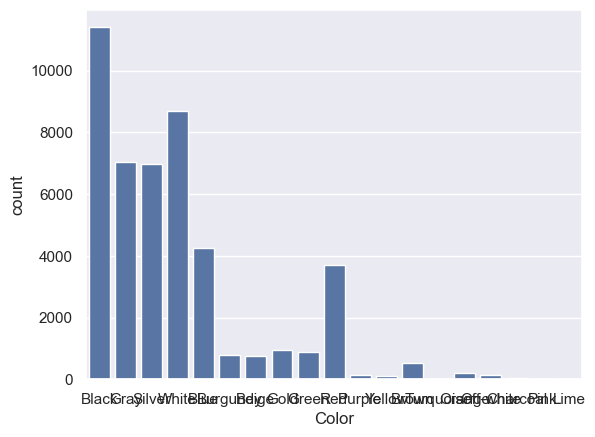

In [55]:
sns.countplot(x='Color', data=df)

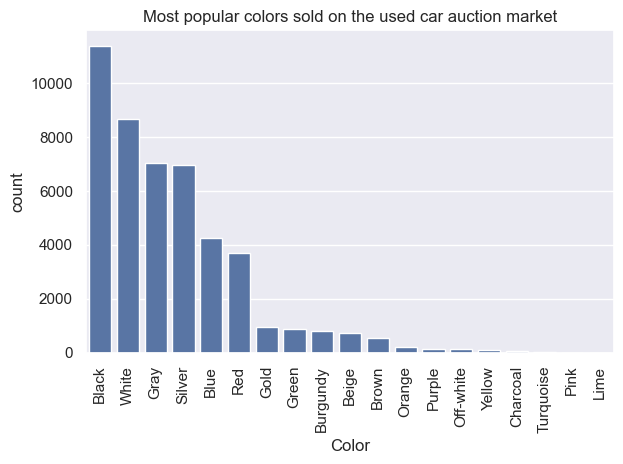

In [56]:
large_to_small = df.groupby('Color').size().sort_values(ascending=False)
sns.countplot(x='Color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

<Axes: xlabel='Make', ylabel='count'>

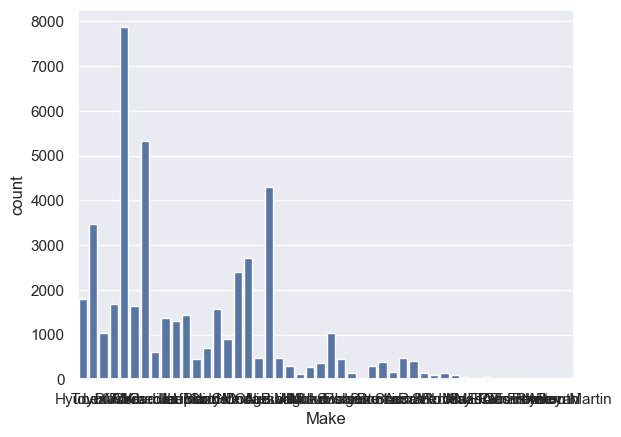

In [60]:
sns.countplot(x='Make', data=df)

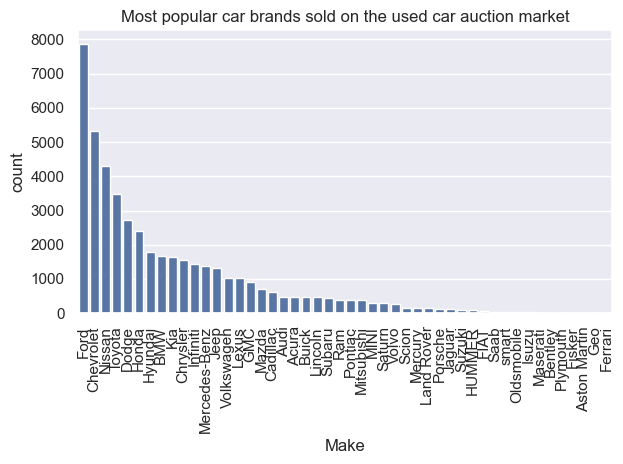

In [61]:
large_to_small = df.groupby('Make').size().sort_values(ascending=False)
sns.countplot(x='Make', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford is the most popular car brand of used cars sold in auctions as shown in the graph above it has the highest count which is closely to 8000, followed very closely by Chevrolet, followed very closely by Nissan, followed very closely by Toyota.

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

In [65]:
average_prices = df.groupby('Transmission')['Selling price'].mean()
print(average_prices)

Transmission
Automatic    13761.075476
Manual       11181.775758
Name: Selling price, dtype: float64


<Axes: xlabel='Transmission', ylabel='Selling price'>

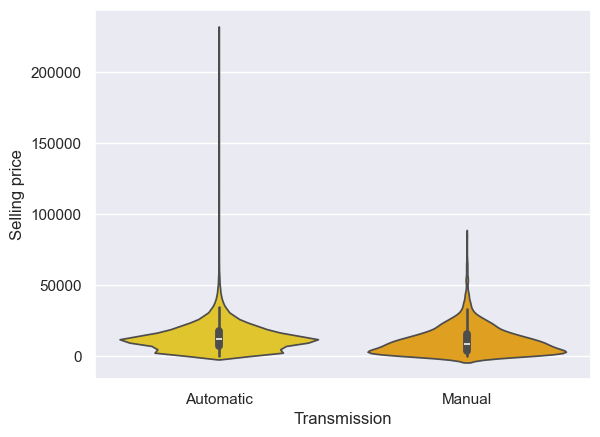

In [66]:
sns.violinplot(x='Transmission', y='Selling price', data=df, palette='Wistia', hue='Transmission', legend=False)

**Answer for Q2**: Yes, automatic cars, on average, sell for a higher price than manual cars. Automatic cars sell on average for 13761.075476 
but manual cars sell on average for 11181.775758  

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

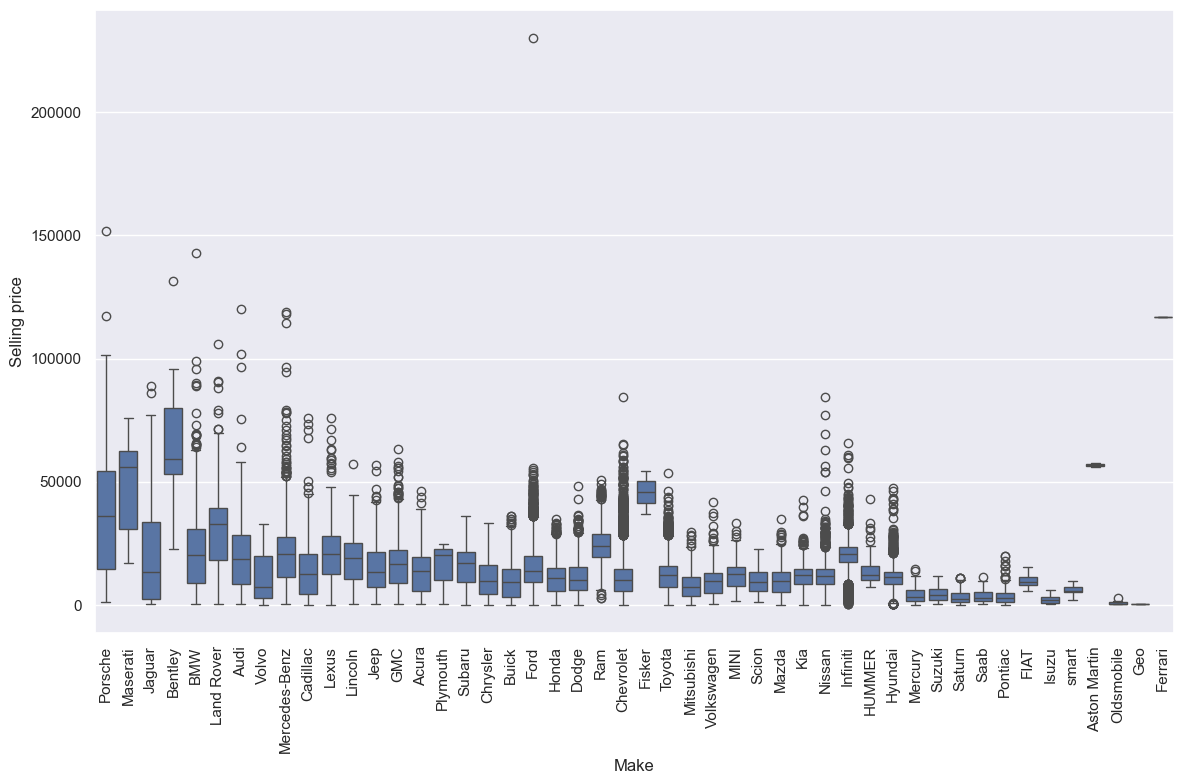

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


iqr = df.groupby('Make')['Selling price'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

sorted_makes = iqr.sort_values(ascending=False).index

plt.figure(figsize=(12, 8))  
sns.boxplot(x='Make', y='Selling price', data=df, order=sorted_makes)


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [71]:
import pandas as pd

iqr_values = df.groupby('Make')['Selling price'].describe(percentiles=[0.25, 0.75])['75%'] - df.groupby('Make')['Selling price'].describe(percentiles=[0.25, 0.75])['25%']

iqr_df = iqr_values.reset_index()
iqr_df.columns = ['Make', 'IQR']

sorted_iqr_df = iqr_df.sort_values(by='IQR', ascending=False)

top_widest_makes = sorted_iqr_df.head(5)
print("Car makes with the widest distribution of selling prices:")
print(top_widest_makes)

Car makes with the widest distribution of selling prices:
        Make      IQR
37   Porsche  39800.0
28  Maserati  31875.0
21    Jaguar  31325.0
4    Bentley  26487.5
3        BMW  21875.0


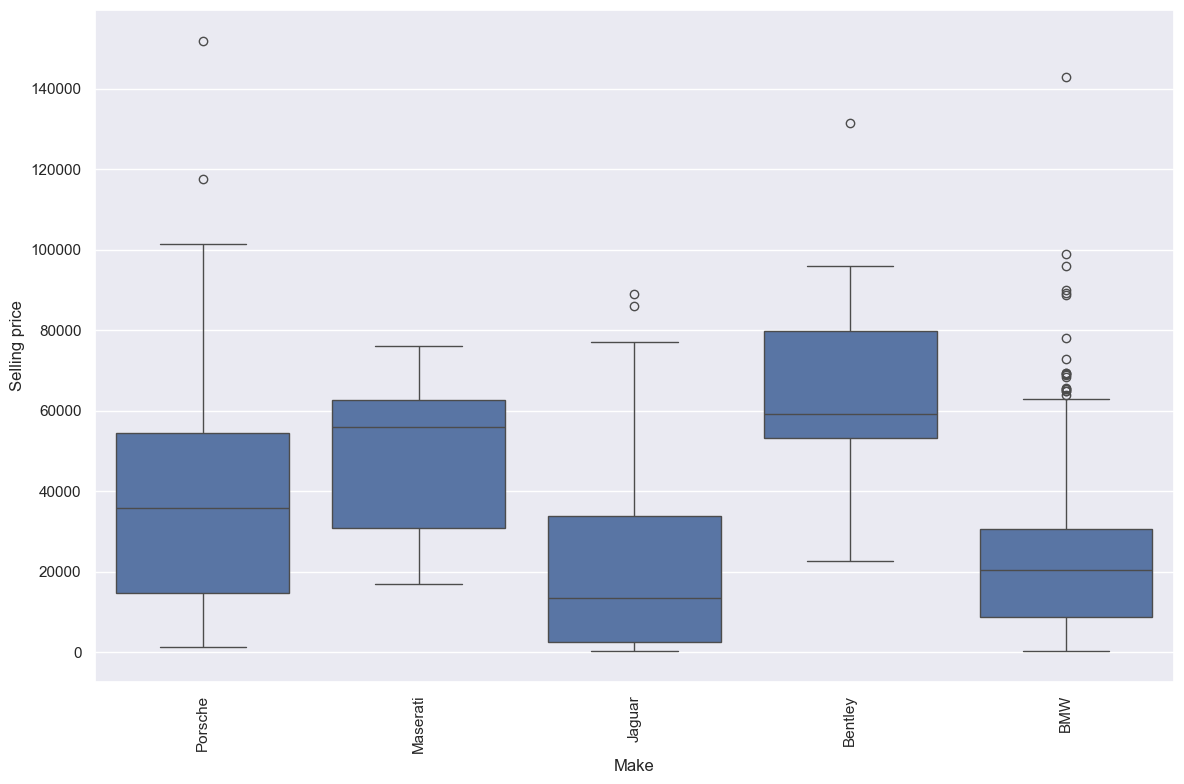

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iqr = df.groupby('Make')['Selling price'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

sorted_makes_top5 = iqr.sort_values(ascending=False).index[:5]

plt.figure(figsize=(12, 8))  # Adjust the size of the plot
sns.boxplot(x='Make', y='Selling price', data=df[df['Make'].isin(sorted_makes_top5)], order=sorted_makes_top5)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Answer for Q3**: Boxplots can be used to demonstrate the distribution of quantitative data to compare multiple variables with each other or compare different levels of a categorical variable. Boxplots specifically show the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values, respectively for a set of data. Thus, it provides a five-number summary for data. The car makes which have the widest distribution are Porsche follwed by Maserati. For simplicity of the graph, we displayed the first five in the box plot. But, also we displayed all of them in graph above this. For the most expensive car, According to the median (Q2) identified as a black line in the boxplot, it is Bentley, since it has the highest price as shown in the graph. The second most expensive car is Maserati that is also shown in the graph.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [76]:
corr = df.corr(numeric_only=True)
print(corr)

                   Year  Condition  Odometer(mi)  Selling price
Year           1.000000   0.549158     -0.777219       0.581164
Condition      0.549158   1.000000     -0.540371       0.529141
Odometer(mi)  -0.777219  -0.540371      1.000000      -0.580900
Selling price  0.581164   0.529141     -0.580900       1.000000


Text(0.5, 1.0, 'Scatter Plot of Odometer(mi) vs Selling price')

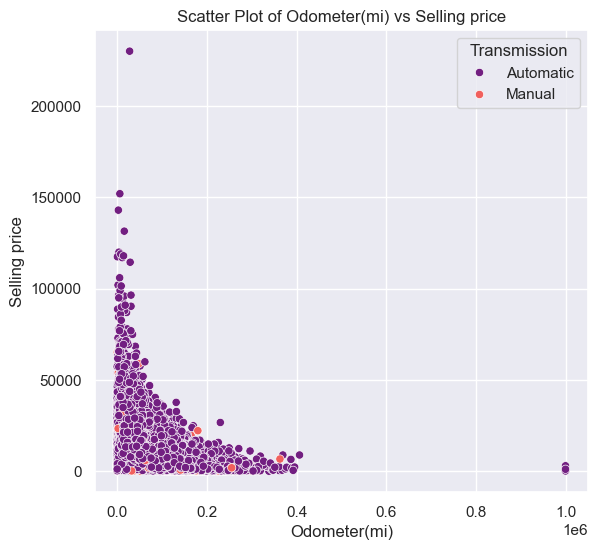

In [77]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Odometer(mi)', y='Selling price', data=df, palette='magma', hue='Transmission', ax=ax)
ax.set_title('Scatter Plot of Odometer(mi) vs Selling price')

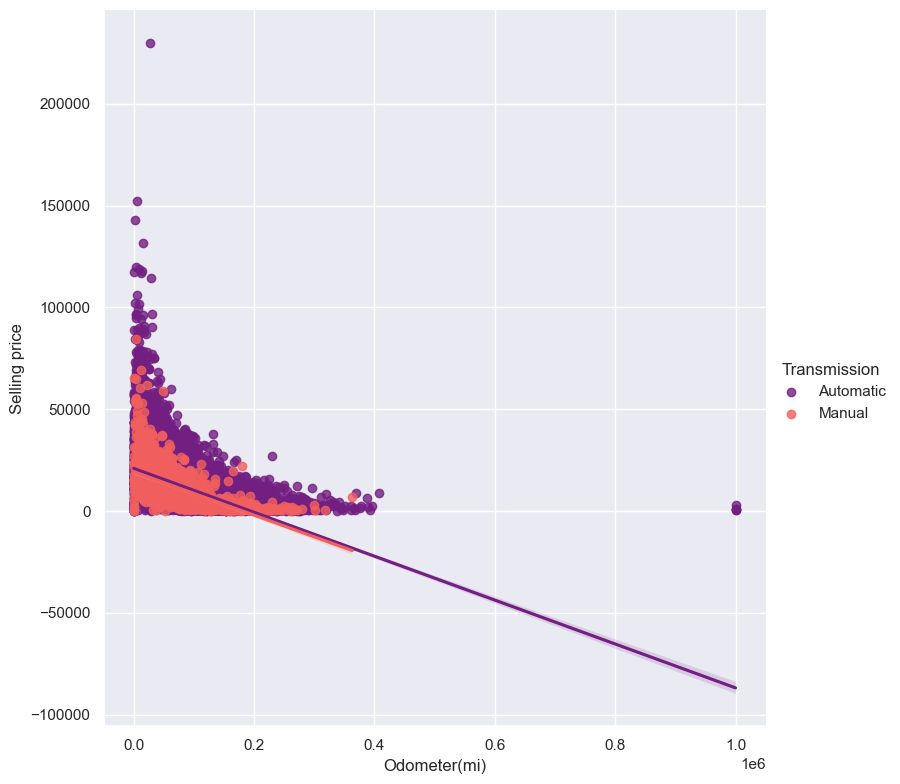

In [78]:
sns.lmplot(x='Odometer(mi)', y='Selling price', data=df, palette='magma', hue='Transmission', height=8);

**Answer for Q4**: They are highly negatively correlated because as Odometer(mi) increase the selling price decreases as shown in the graph. The graph shows negative slope as line goes down. SO, Cars with higher mileage tend to sell for less, which is typical in the used car market.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [82]:
corr = df.corr(numeric_only=True)
print(corr)

                   Year  Condition  Odometer(mi)  Selling price
Year           1.000000   0.549158     -0.777219       0.581164
Condition      0.549158   1.000000     -0.540371       0.529141
Odometer(mi)  -0.777219  -0.540371      1.000000      -0.580900
Selling price  0.581164   0.529141     -0.580900       1.000000


Text(0.5, 1.0, 'Scatter Plot of Condition vs Selling price')

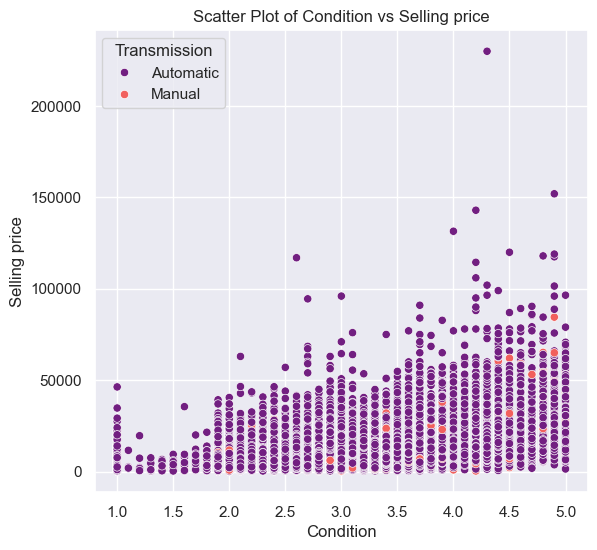

In [83]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Condition', y='Selling price', data=df, palette='magma', hue='Transmission', ax=ax)
ax.set_title('Scatter Plot of Condition vs Selling price')

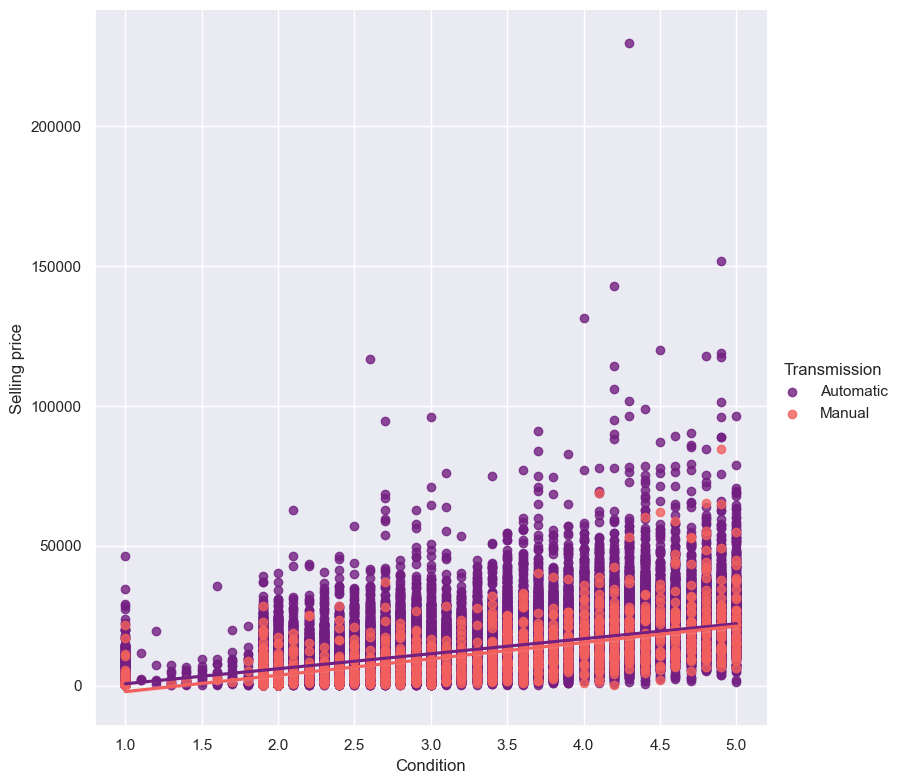

In [84]:
sns.lmplot(x='Condition', y='Selling price', data=df, palette='magma', hue='Transmission', height=8);

**Answer for Q5**: They are slightly positively correlated because as Condition increases, the selling price increases as shown in the graph. The graph shows positive slope as line goes up. It is also slightly positive as the best fit line goods slightly up, it is not that mush steep.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

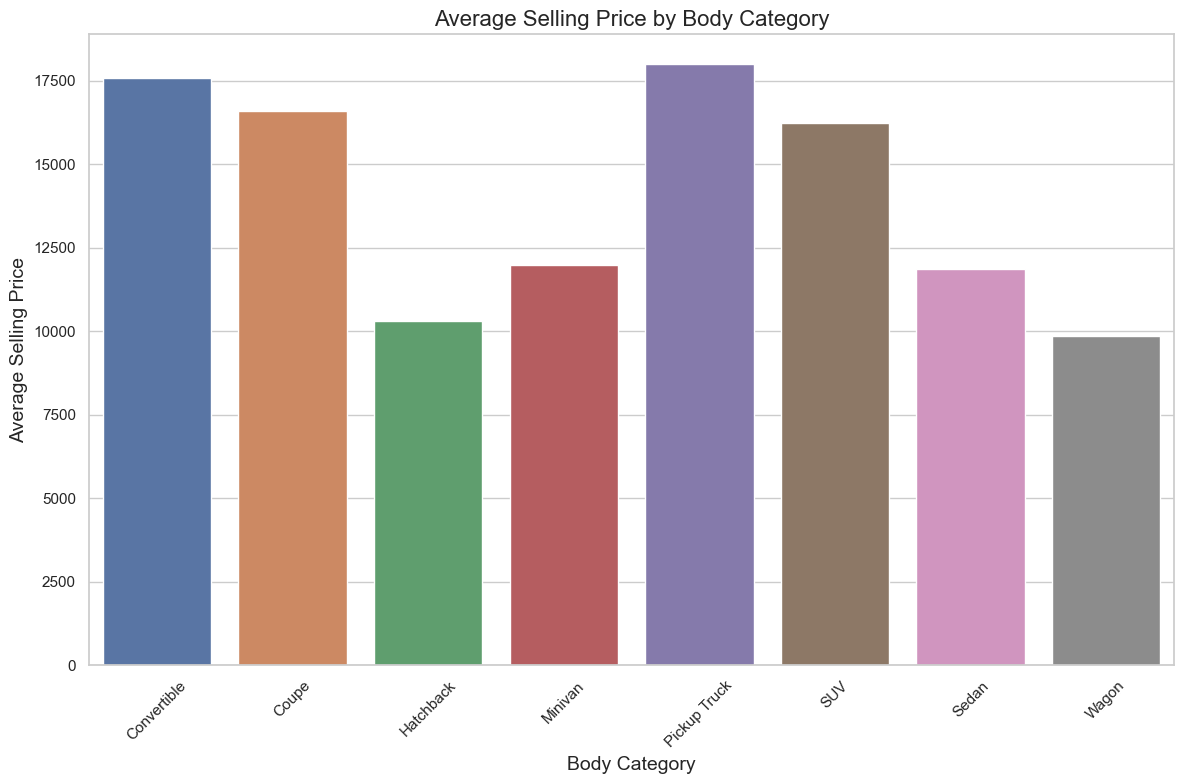

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

body_price_avg = df.groupby('Body')['Selling price'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Body', y='Selling price', hue='Body', data=body_price_avg, dodge=False, legend=False)

plt.title('Average Selling Price by Body Category', fontsize=16)
plt.xlabel('Body Category', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [89]:
body_price_avg = df.groupby('Body')['Selling price'].mean().reset_index()

ranked_body_price = body_price_avg.sort_values(by='Selling price', ascending=False)

print(ranked_body_price)


           Body  Selling price
4  Pickup Truck   17981.766407
0   Convertible   17581.563278
1         Coupe   16586.987042
5           SUV   16221.941270
3       Minivan   11981.053571
6         Sedan   11860.443575
2     Hatchback   10320.636123
7         Wagon    9872.678720


**Answer for Q6**: Yes, there are differences in the average car price due to the car's body type.
According to ranking of selling price,The rank is accordingly:
1st rank: pickup truck
2nd rank: convertible
3rd rank: coupe
4th rank: SUV
5th rank: Minivan
6th rank: Sedan
7th rank: hatchback
8th rank: Wagon
The Pichup Truck is the most expensive car body type because it has the highest selling price. 
The Wagon is the least expensive car body type because it has the lowest selling price.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [92]:
df.head(20)

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer(mi),Color,Interior,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,MA,3.9,50404.0,Black,Gray,The Hertz Corporation,10900.0,Tue Jun 02 2015
1,2014,Toyota,4Runner,SR5,SUV,Automatic,jtezu5jr2e5064567,FL,4.9,17846.0,Gray,Black,Award Auto Sales And Leasing Inc,29900.0,Wed Feb 18 2015
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,FL,4.1,21122.0,Silver,Black,Lexus Financial Services,24200.0,Tue Jan 20 2015
3,2002,BMW,X5,4.4i,SUV,Automatic,5uxfb33562lh33864,FL,1.9,145303.0,Black,Black,Peddle Llc,3200.0,Wed Mar 04 2015
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,1ftne2ew0eda31832,WA,4.9,6714.0,White,Gray,U-Haul,22100.0,Wed Feb 18 2015
5,2014,Kia,Optima,LX,Sedan,Automatic,5xxgm4a70eg329048,CO,4.6,8386.0,Black,Gray,"Kia Motors America, Inc",15500.0,Tue Jun 16 2015
6,2007,Chevrolet,Avalanche,LS,Pickup Truck,Automatic,3gnfk12387g117727,WA,3.6,100676.0,Gray,Black,Lexus Of Tacoma At Fife,13600.0,Wed Jan 21 2015
7,2008,Cadillac,CTS,Base,Sedan,Automatic,1g6dv57v180180380,CA,4.6,87860.0,White,Beige,Aaero Sweet Company,14700.0,Wed Jan 14 2015
8,2011,Mercedes-Benz,E-Class,E350,Sedan,Automatic,wddhf5gb6ba419589,IL,1.7,27819.0,Gray,Black,Wells Fargo Dealer Services,20000.0,Thu Jan 15 2015
9,2014,Kia,Forte,LX,Sedan,Automatic,knafx4a60e5219872,NV,4.9,4046.0,Blue,Gray,"Kia Motors America, Inc",13600.0,Fri Mar 06 2015


In [93]:
df.drop(columns=['Vin'], inplace=True)
df.drop(columns=['State'], inplace=True)
df.drop(columns=['Interior'], inplace=True)


**Feature selection explanation**:
Attributes to Include (Independent Variables):
Year: The year of production can significantly affect the selling price, as newer models are typically sold for higher prices in comparison to older models.
Make: The brand of the car often influences perceived value, as for example popular brands such as bmw,porche generally having higher selling price in comparison to other brands and where they influence the customers to pay more.
Model: Specific models can have varying demand and market values.
Trim: The trim level can impact features and overall value, thus affecting the selling price.
Body: Different body types (e.g., Sedan, SUV) can have varying price ranges based on market demand.
Condition: Overall condition of the car typically affect selling prices as a car having better conditions is sold with higher prices than a car having bad conditions.
Color: Color affect selling price as black cars are more desirable by customers and are sold with the highest prices when comparing according to colors.
saledate: Sale dates affect selling prices as for example black friday there are offers on cars and selling prices are less in comparison to other demanding seasons where sellers raise price of cars
odometer: The less distance the car makes,the higher the price it is sold for,therefore the distance that the car makes affect selling price
seller: The reputation of seller makes the car be sold for high prices incomparison to non-reputable sellers and can influence buyer confidence and price.
Transmission: The type of transmission(whether the car is manual or automatic)affect its selling price as automatic price is sold for higher prices compared to manual cars
models: Some car models are known for their performance,exclusive features,reliability as a result these cars are sold for higher prices than other cars(transmission affect selling price)

Attributes to Exclude (Independent Variables):
vin: Vehichle identification number is unique but doesnt affect selling price as vin of 600 or vin of 800 is no difference when selling a car.
state: State doesnt affect selling price as car sold in emirates for example is also sold in egypt with same prices.
interior: The interior color may not doesn't influence the selling price compared to other factors like condition or brand.

In [95]:
df.head()

,Year,Make,Model,Trim,Body,Transmission,Condition,Odometer(mi),Color,Seller,Selling price,Sale date
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,3.9,50404.0,Black,The Hertz Corporation,10900.0,Tue Jun 02 2015
1,2014,Toyota,4Runner,SR5,SUV,Automatic,4.9,17846.0,Gray,Award Auto Sales And Leasing Inc,29900.0,Wed Feb 18 2015
2,2012,Lexus,IS 250,Base,Sedan,Automatic,4.1,21122.0,Silver,Lexus Financial Services,24200.0,Tue Jan 20 2015
3,2002,BMW,X5,4.4i,SUV,Automatic,1.9,145303.0,Black,Peddle Llc,3200.0,Wed Mar 04 2015
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,4.9,6714.0,White,U-Haul,22100.0,Wed Feb 18 2015


In [96]:
categorical_columns = ['Body']
df = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True, dtype='int8')


In [97]:
df.head()

,Year,Make,Model,Trim,Transmission,Condition,Odometer(mi),Color,Seller,Selling price,Sale date,Body_Coupe,Body_Hatchback,Body_Minivan,Body_Pickup Truck,Body_SUV,Body_Sedan,Body_Wagon
0,2013,Hyundai,Sonata,GLS,Automatic,3.9,50404.0,Black,The Hertz Corporation,10900.0,Tue Jun 02 2015,0,0,0,0,0,1,0
1,2014,Toyota,4Runner,SR5,Automatic,4.9,17846.0,Gray,Award Auto Sales And Leasing Inc,29900.0,Wed Feb 18 2015,0,0,0,0,1,0,0
2,2012,Lexus,IS 250,Base,Automatic,4.1,21122.0,Silver,Lexus Financial Services,24200.0,Tue Jan 20 2015,0,0,0,0,0,1,0
3,2002,BMW,X5,4.4i,Automatic,1.9,145303.0,Black,Peddle Llc,3200.0,Wed Mar 04 2015,0,0,0,0,1,0,0
4,2014,Ford,E-Series Van,E-250,Automatic,4.9,6714.0,White,U-Haul,22100.0,Wed Feb 18 2015,0,0,1,0,0,0,0


In [98]:
categorical_columns = ['Transmission']
df = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True, dtype='int8')


In [99]:
df.head()

,Year,Make,Model,Trim,Condition,Odometer(mi),Color,Seller,Selling price,Sale date,Body_Coupe,Body_Hatchback,Body_Minivan,Body_Pickup Truck,Body_SUV,Body_Sedan,Body_Wagon,Transmission_Manual
0,2013,Hyundai,Sonata,GLS,3.9,50404.0,Black,The Hertz Corporation,10900.0,Tue Jun 02 2015,0,0,0,0,0,1,0,0
1,2014,Toyota,4Runner,SR5,4.9,17846.0,Gray,Award Auto Sales And Leasing Inc,29900.0,Wed Feb 18 2015,0,0,0,0,1,0,0,0
2,2012,Lexus,IS 250,Base,4.1,21122.0,Silver,Lexus Financial Services,24200.0,Tue Jan 20 2015,0,0,0,0,0,1,0,0
3,2002,BMW,X5,4.4i,1.9,145303.0,Black,Peddle Llc,3200.0,Wed Mar 04 2015,0,0,0,0,1,0,0,0
4,2014,Ford,E-Series Van,E-250,4.9,6714.0,White,U-Haul,22100.0,Wed Feb 18 2015,0,0,1,0,0,0,0,0


In [100]:
specific_row = df.loc[57]  
print(specific_row)

Year                               2008
Make                              Honda
Model                             Civic
Trim                                 Si
Condition                           1.9
Odometer(mi)                    93799.0
Color                             Black
Seller                 Honda Of Concord
Selling price                    8700.0
Sale date               Wed Mar 04 2015
Body_Coupe                            0
Body_Hatchback                        0
Body_Minivan                          0
Body_Pickup Truck                     0
Body_SUV                              0
Body_Sedan                            1
Body_Wagon                            0
Transmission_Manual                   1
Name: 57, dtype: object


In [101]:
df['Transmission_Manual'] = df['Transmission_Manual'].replace({0: 1, 1: 0})

df.rename(columns={'Transmission_Manual': 'Transmission_Yes'}, inplace=True)


In [102]:
df.head()

,Year,Make,Model,Trim,Condition,Odometer(mi),Color,Seller,Selling price,Sale date,Body_Coupe,Body_Hatchback,Body_Minivan,Body_Pickup Truck,Body_SUV,Body_Sedan,Body_Wagon,Transmission_Yes
0,2013,Hyundai,Sonata,GLS,3.9,50404.0,Black,The Hertz Corporation,10900.0,Tue Jun 02 2015,0,0,0,0,0,1,0,1
1,2014,Toyota,4Runner,SR5,4.9,17846.0,Gray,Award Auto Sales And Leasing Inc,29900.0,Wed Feb 18 2015,0,0,0,0,1,0,0,1
2,2012,Lexus,IS 250,Base,4.1,21122.0,Silver,Lexus Financial Services,24200.0,Tue Jan 20 2015,0,0,0,0,0,1,0,1
3,2002,BMW,X5,4.4i,1.9,145303.0,Black,Peddle Llc,3200.0,Wed Mar 04 2015,0,0,0,0,1,0,0,1
4,2014,Ford,E-Series Van,E-250,4.9,6714.0,White,U-Haul,22100.0,Wed Feb 18 2015,0,0,1,0,0,0,0,1


In [103]:
df.rename(columns={'Transmission_Yes': 'Transmission_Automatic'}, inplace=True)

In [104]:
print(df['Make'].unique())
print(df['Model'].unique())
print(df['Trim'].unique())
print(df['Color'].unique())
print(df['Seller'].unique())
print(df['Sale date'].unique())

['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sierra 1500' 'Cooper' 'XJ' 'Edge' 'Focus' 'Avenger'
 'Civic' 'Escape' 'Camry' 'Encore' 'Accord' 'So

In [105]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()

for column in ['Make', 'Model', 'Trim', 'Color', 'Seller', 'Sale date']:
    df_encoded[column] = le.fit_transform(df[column])


In [106]:
df_encoded.head()

,Year,Make,Model,Trim,Condition,Odometer(mi),Color,Seller,Selling price,Sale date,Body_Coupe,Body_Hatchback,Body_Minivan,Body_Pickup Truck,Body_SUV,Body_Sedan,Body_Wagon,Transmission_Automatic
0,2013,18,532,494,3.9,50404.0,1,4223,10900.0,108,0,0,0,0,0,1,0,1
1,2014,44,17,847,4.9,17846.0,7,490,29900.0,132,0,0,0,0,1,0,0,1
2,2012,25,287,278,4.1,21122.0,15,2566,24200.0,105,0,0,0,0,0,1,0,1
3,2002,3,607,209,1.9,145303.0,1,3321,3200.0,147,0,0,0,0,1,0,0,1
4,2014,13,161,382,4.9,6714.0,17,4408,22100.0,132,0,0,1,0,0,0,0,1


In [107]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    46578 non-null  int64  
 1   Make                    46578 non-null  int32  
 2   Model                   46578 non-null  int32  
 3   Trim                    46578 non-null  int32  
 4   Condition               46578 non-null  float64
 5   Odometer(mi)            46578 non-null  float64
 6   Color                   46578 non-null  int32  
 7   Seller                  46578 non-null  int32  
 8   Selling price           46578 non-null  float64
 9   Sale date               46578 non-null  int32  
 10  Body_Coupe              46578 non-null  int8   
 11  Body_Hatchback          46578 non-null  int8   
 12  Body_Minivan            46578 non-null  int8   
 13  Body_Pickup Truck       46578 non-null  int8   
 14  Body_SUV                46578 non-null

In [108]:
numerical_columns = ['Condition','Odometer(mi)']


df_encoded[numerical_columns] = (

    df_encoded[numerical_columns] - df_encoded[numerical_columns].min()

) /(

    df_encoded[numerical_columns].max() - df_encoded[numerical_columns].min()
)


df_encoded.head()

,Year,Make,Model,Trim,Condition,Odometer(mi),Color,Seller,Selling price,Sale date,Body_Coupe,Body_Hatchback,Body_Minivan,Body_Pickup Truck,Body_SUV,Body_Sedan,Body_Wagon,Transmission_Automatic
0,2013,18,532,494,0.725,0.050403,1,4223,10900.0,108,0,0,0,0,0,1,0,1
1,2014,44,17,847,0.975,0.017845,7,490,29900.0,132,0,0,0,0,1,0,0,1
2,2012,25,287,278,0.775,0.021121,15,2566,24200.0,105,0,0,0,0,0,1,0,1
3,2002,3,607,209,0.225,0.145302,1,3321,3200.0,147,0,0,0,0,1,0,0,1
4,2014,13,161,382,0.975,0.006713,17,4408,22100.0,132,0,0,1,0,0,0,0,1


In [109]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop('Selling price',axis=1) # Independent variable
y = df_encoded['Selling price'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [110]:
print(x_train.dtypes)

Year                        int64
Make                        int32
Model                       int32
Trim                        int32
Condition                 float64
Odometer(mi)              float64
Color                       int32
Seller                      int32
Sale date                   int32
Body_Coupe                   int8
Body_Hatchback               int8
Body_Minivan                 int8
Body_Pickup Truck            int8
Body_SUV                     int8
Body_Sedan                   int8
Body_Wagon                   int8
Transmission_Automatic       int8
dtype: object


## Modelling

_Apply the linear regression model below._

In [112]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [113]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
print(parameter_df)

   parameter                  column   theta_value
0    theta_0             y-intersect -1.400795e+06
1    theta_1                    Year  7.064694e+02
2    theta_2                    Make -1.251494e+01
3    theta_3                   Model -3.888010e-01
4    theta_4                    Trim -3.425939e+00
5    theta_5               Condition  8.506431e+03
6    theta_6            Odometer(mi) -5.371444e+04
7    theta_7                   Color -5.497964e+01
8    theta_8                  Seller -7.881136e-02
9    theta_9               Sale date -2.379772e+00
10  theta_10              Body_Coupe -1.026901e+03
11  theta_11          Body_Hatchback -9.369683e+03
12  theta_12            Body_Minivan -4.892445e+03
13  theta_13       Body_Pickup Truck  2.261546e+03
14  theta_14                Body_SUV -1.184688e+03
15  theta_15              Body_Sedan -6.444568e+03
16  theta_16              Body_Wagon -7.153362e+03
17  theta_17  Transmission_Automatic  6.038140e+01


Will explain later

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [116]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation

#If you are using a local python notebook uncomment the RMSE line below and run
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(y_pred, y_test, squared=False)

#If you are using a cloud python notebook run the below RSME line
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred, y_test)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  6513.00929079147
R^2 obtained is: 0.540864232502771


In [117]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.6737503080811289
The median absolute error (MAE) is:  3389.1306156892097


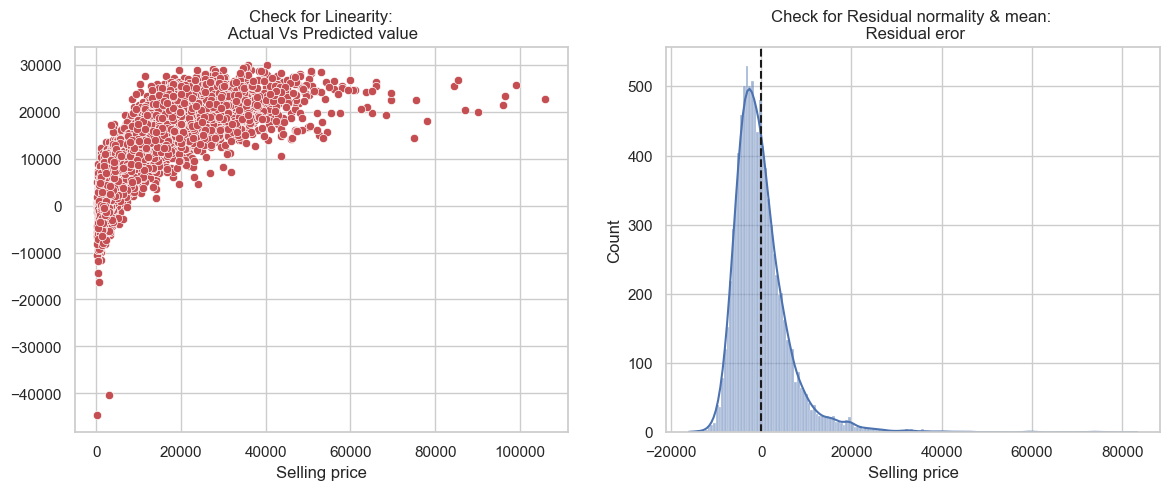

In [118]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

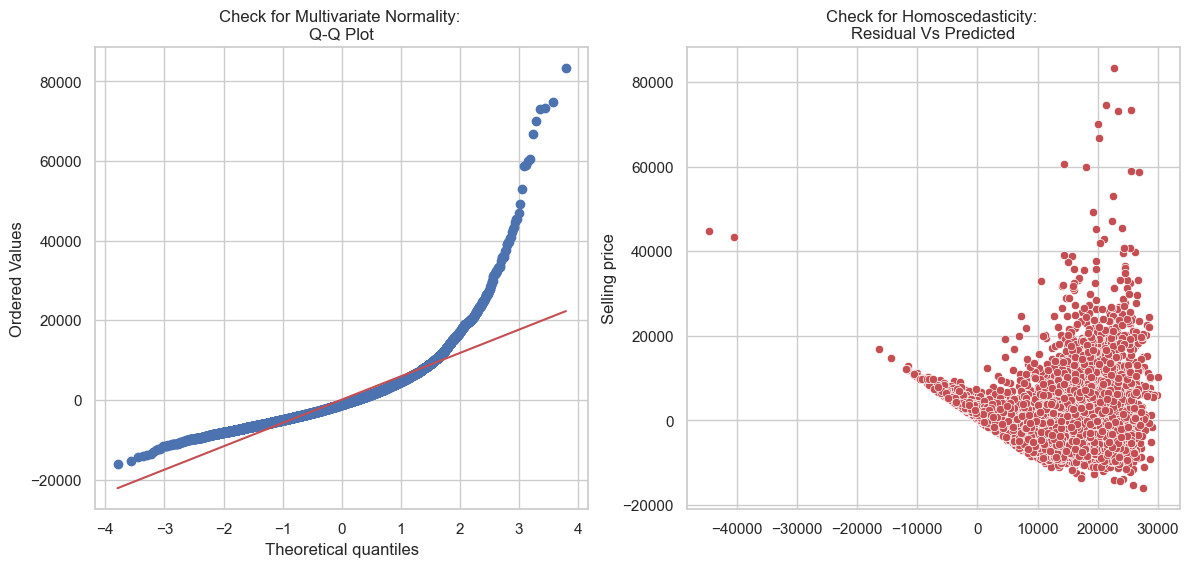

In [119]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [120]:
# Check for Multicollinearity
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_data = pd.DataFrame()
VIF_data['feature'] = x.columns

VIF_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF_data

,feature,VIF
0,Year,110.564906
1,Make,3.700806
2,Model,3.895355
3,Trim,5.793081
4,Condition,11.084648
5,Odometer(mi),3.894859
6,Color,2.752005
7,Seller,4.246620
8,Sale date,8.782649
9,Body_Coupe,2.863986


## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: 
Firstly RMSE:
Root Mean Square Error (RMSE) is an absolute error metric. It explains how close the actual data points are to the model’s values. It measures standard 
deviation of the residuals. Our RMSE of 6513.01 means that the predictions made by the model differ from the actual values by approximately 6513.01 units which is considered a high level of error especially in pricing used cars context, where small inconsistencies can affect profit margins. 
Secondly R^2:
MEASURES OF FIT – 𝑅^2 Some of the variation in 𝑌 can be explained by variation in the 𝑋’s and some cannot. In general 𝑹^𝟐 is the proportion of the
variance in the dependent variable that is predictable from the independent variable(s) and it is a statistical measure for the goodness of fit of a 
model that Tells you the fraction of variance that can be explained by x. It is always between 0 and 1. 0 indicates that no variance has beed explained
and 1 inducates that all variance have been explained (perfect fit of data). 
The linear regression model's  R2  score is 0.54 whish is considered a good  R2  value because some companies may find an  R2>0.3  to be sufficient for
their needs. In general, the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response 
variable. How high an R-squared value needs to be to be considered “good” varies based on the field. Some fields require higher precision than others.
The R² value of 0.54 suggests that approximately 54% of the variance in the selling price can be explained by the model. While this indicates a moderate
fit.
Thirdly MAPE:
mean absolute percentage error, which is sensitive to relative errors (recommended to use for skewed and heteroscedastic data, as in this context).
The MAPE of 0.6738 translates to about 67.38% average error in percentage terms, which is of a high value. This means that on average, the predicted 
prices highly deviates from the actual prices as it deviated by more than two-thirds.As a result of this high MAPE,model needs improvment and refinement. In the general, the lower the MAPE, the better.
Forthly MAE:
The median absolute error (MAE), which is more robust to outliers than RMSE. MAE treats all errors equally, without squaring them, which makes it less 
sensitive to outliers. MAE is the average of the absolute differences between the actual values and the predicted values.
MAE of 3389 indicates that the model is somehow accurate but still has a noticeable error margin.In general, The lower the MAE, the better the model’s
performance.
Fifthly Problems, Solutions and Recommendations:
Problems occur in the following:Firstly,The current linear regression model for predicting used car prices shows significant problems, with a high RMSE 
of 6513.01 and this indicates large deviations between predicted and actual values.Secondly,MAPE of 67.38%,which is a high percentage error and the 
results produced by the model might not be trusted or accurate.Thirdly,The moderate R² of 0.54 suggests that the model just explains 54% of the variance
in car prices, leaving nearly half the model unexplained which is a huge problem as most industries require comprehensive model explanation for decision
making.Lasly,Although the MAE of 3389.13 is less sensitive to outliers, it still reflects a considerable error. These metrics, combined with 
visualizations indicating potential outliers and as a result,the model is not suitable for providing reliable price estimates. 
To improve, more relevant features should be added, outliers handled, and other sophisticated machine learning models could be explored and used.
To finalize,the model is not recommended for businesses needing an accurate car pricing model.

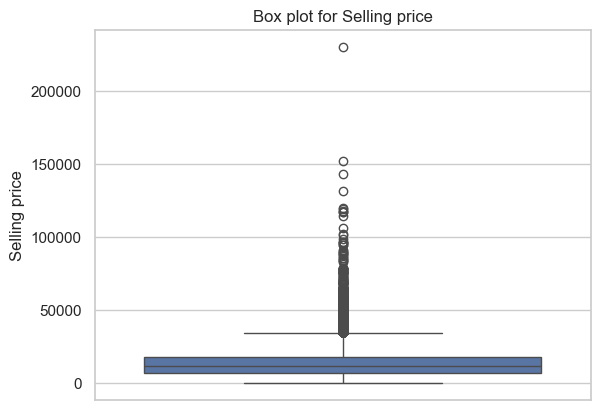

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for 'Selling price'
sns.boxplot(df['Selling price'])
plt.title('Box plot for Selling price')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Selling price'].quantile(0.25)
Q3 = df['Selling price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in 'Selling price'
df_no_outliers = df[(df['Selling price'] >= lower_bound) & (df['Selling price'] <= upper_bound)]


In [123]:
# Ensure that the same outliers are removed from the encoded dataframe (df_encoded)
df_encoded_no_outliers = df_encoded[df_encoded.index.isin(df_no_outliers.index)]


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-test split
X = df_encoded_no_outliers.drop(columns=['Selling price'])  # assuming 'Selling price' is the target column
y = df_encoded_no_outliers['Selling price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [125]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make predictions
y_pred = lin_reg.predict(X_test)

# Calculate performance metrics
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Output the results
print(f"New RMSE: {rmse}")
print(f"New R²: {r2}")
print(f"New MAE: {mae}")
print(f"New MAPE: {mape}%")


New RMSE: 4685.710892730167
New R²: 0.6271215555937322
New MAE: 3605.7766026903973
New MAPE: 58.38781336462595%


**Comparing model with outlier with the model without outlier:**
After the new linear regression model we made(removing outliers from the older model),The results showed that the new model is more enhanced better and improved performance in comparison to the older model in several ways:Firstly,The Root Mean Square Error (RMSE) decreased from 6513.01 to 4685.71, indicating that the predictions are now closer to the actual selling prices, where the new model is more reliable for estimating used car prices.Secondly,The R² value improved from 0.54 to 0.63,meaning that the new model explains approximately 63% of the variance in the selling price, a notable increase in the model's explanation(increase by 9% which is a significant increase). Thirdly,Although the Mean Absolute Error (MAE) increased slightly from 3389.13 to 3605.78,the model still exhibits an improved overall performance comparing it to the older model.Lastly,The Mean Absolute Percentage Error (MAPE) decreased from 67.38% to 58.39%,reflecting a significant reduction in the average percentage error of the model prediction. Overall,the removal of outliers has led to a more accurate and reliable model for the dealership's price estimations and now they can make more accurate decisions with the new model than the older model.
